<a href="https://colab.research.google.com/github/zahraa57/Deep-Learining-NLP/blob/main/Copy_of_NLP_Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:
- The objective from this task is to use your NLP skills to build a ML model can <b>classify the news categories</b>.
- Try hard to get the maximum value of the preferable evaluation metric using any technique.
- <b>Concat headlines and short descriptions</b> and use them in classification. 

### Time:
- This task mustn't take more than <b>3 hours</b>.
    - Load Data and EDA : 30 minutes
    - Cleaning and Preprocessing : 60 Minutes
    - Modelling and Enhancement : 60 Minutes
    - Extratime : 30 minutes

### Fixed Rules:
- train test split 80% : 20%
- all random seeds = 42

# Delivery:
## Through this [form](https://forms.gle/PshJQw2bTa48Ligz7)

> ### Take a deep breath, read the instructions again, and then start

## Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re, html, unicodedata ,string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer 
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [ ]:
df = pd.read_json('/content/drive/MyDrive/nlp/Dataset.json', lines=True)

In [ ]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [ ]:
df.shape

(200853, 6)

In [ ]:
df["category"].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
len(df["category"].unique())

41

In [ ]:
df["category"].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

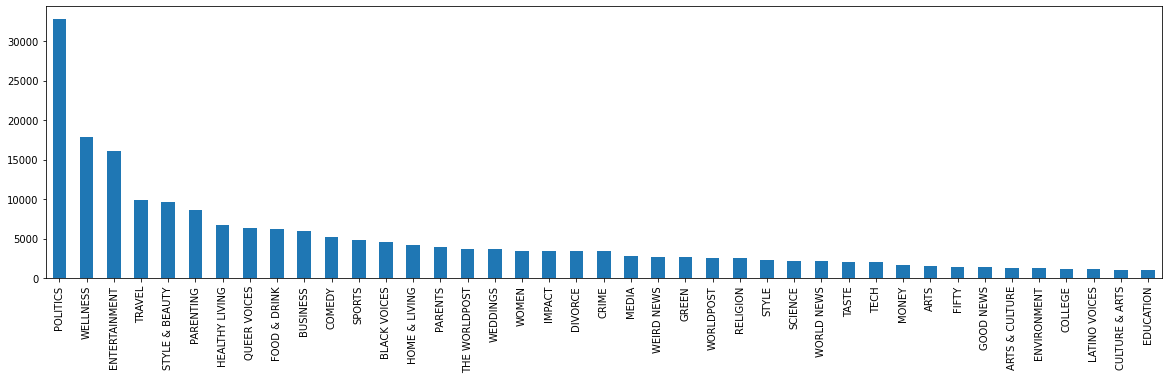

In [ ]:
df["category"].value_counts().plot(kind='bar', figsize=(20, 5))

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

13

## Cleaning & Preprocessing

In [ ]:
df["text"] = df["headline"] + " "+df["short_description"]
df.head(3)

,category,headline,authors,link,short_description,date,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...


In [ ]:
df.loc[1,"short_description"]

'Of course it has a song.'

In [ ]:
df.loc[1,"headline"]

"Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song"

In [ ]:
df.loc[1,"text"]

"Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song."

In [ ]:
df=df.drop_duplicates()

In [ ]:
new_df=df[["category","text"]]

In [ ]:
new_df.head(3)

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...


In [ ]:
new_df.loc[10,"text"]

'Justin Timberlake Visits Texas School Shooting Victims The pop star also wore a "Santa Fe Strong" shirt at his show in Houston.'

In [ ]:
new_df.loc[1000,"text"]

'Pakistani Interior Minister Ahsan Iqbal Shot By Gunman Linked To New Religious Party A motive for the attack has not been released.'

In [ ]:
new_df.loc[5000,"text"]

'Trump On Fox Savages \'Leaker\' Schiff Who Has \'Probably\' Done Something \'Illegal\'\' Then president pleads that "we have to come together as a nation."'

In [ ]:
new_df.loc[10000,"text"]

'Another Trumpism For The History Books: Pearl Harbor Was \'A Pretty Wild Scene\' But the veterans "gave it to \'em pretty good," the president says on anniversary of the 1941 attack.'

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()

def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    stop_words = stopwords.words('english')
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem or lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [ ]:
c=[]
df1 = normalize_corpus(df["text"])
for t in df1:
  words=text_to_word_sequence(t)
  for w in words:
    c.append(w)
v = sorted(list(set(c)))
print(len(c))
print(len(v))

3484612
88567


len of unique words ia 88_567 i  will choose first 40_000 word

In [ ]:
new_df["text"]=new_df["text"].apply(normalize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df["text"].head(3)

0    mass shoot texas last week tv leave husband ki...
1    smith join diplo nicky jam world cup official ...
2    hugh grant marry first time age actor longtime...
Name: text, dtype: object

In [ ]:
new_df.loc[1,"text"]

'smith join diplo nicky jam world cup official song course song'

In [ ]:
new_df.loc[5000,"text"]

'trump fox savage leaker schiff probably do something illegal president plead come together nation'

In [ ]:
#longest text
new_df["text"].apply(lambda x: len(str(x).split(' '))).max()

140

In [ ]:
new_df["text"].apply(lambda x: len(str(x).split(' '))).mean()

17.35026389165505

In [ ]:
new_df["text"].apply(lambda x: len(str(x).split(' '))).median()

17.0

In [ ]:
new_df["text"].apply(lambda x: len(str(x).split(' '))).min()

1

In [ ]:
new_df["text"].apply(lambda x: len(str(x).split(' '))).mode()

0    18
dtype: int64

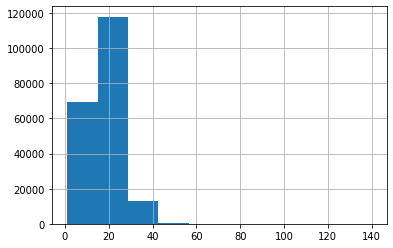

In [ ]:
new_df["text"].apply(lambda x: len(str(x).split(' '))).hist()

In [ ]:
new_df["text"].duplicated().sum()

767

In [ ]:
new_df.drop_duplicates(["text"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
new_df["text"].duplicated().sum()

0

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
train_txt, test_text, train_labels, test_labels = train_test_split(new_df["text"], new_df["category"],stratify=new_df["category"], test_size=0.2, random_state=42)

In [ ]:
print(train_txt.shape)
print(train_labels.shape)
print(test_text.shape)
print(test_labels.shape)

(160058,)
(160058,)
(40015,)
(40015,)


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(train_labels)
train_labels = to_categorical(vec)
vec = label_encoder.fit_transform(test_labels)
test_labels = to_categorical(vec)

In [ ]:
print(train_labels.shape)
print(test_labels.shape)

(160058, 41)
(40015, 41)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 40_000
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(train_txt)
train_sequences = tokenizer.texts_to_sequences(train_txt)
print(len(train_sequences))
print(train_sequences[:3])
test_sequences = tokenizer.texts_to_sequences(test_text)
print(len(test_sequences))
print(test_sequences[:3])

160058
[[1816, 124, 7494, 127, 1357, 1244, 34, 10, 4979, 203, 64, 198, 6, 7494, 127, 3533, 30, 41, 77], [5, 328, 11649, 8358, 20654, 276, 1348, 328, 495, 5906, 436, 664, 460], [437, 33, 9363, 79, 34, 262, 317, 575, 722, 9589, 16601, 1537, 5354, 79, 485, 27, 1264]]
40015
[[153, 7071, 75, 283, 50, 3567, 911, 1685, 1074, 54, 16526, 34, 449, 7071, 188, 33522, 2, 15316, 433, 388, 431, 65, 313, 7071, 736, 1977], [43, 4, 11059, 790, 422, 4289, 4052, 2108, 3831, 1429, 1207, 933, 725, 77, 322, 211, 375, 298, 2606], [566, 1078, 1028, 2664, 85, 3109, 85, 3109, 1830]]


In [ ]:
MAX_LEN = 30
train_padded = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=MAX_LEN)
print(train_padded.shape)
test_padded = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=MAX_LEN)
print(test_padded.shape)

(160058, 30)
(40015, 30)


In [ ]:
import numpy as np

In [ ]:
 np.isnan(train_padded).sum()

0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.metrics import  Precision, Recall

EMB_SIZE = 128

model = Sequential([
           Embedding(MAX_WORDS, EMB_SIZE, mask_zero=True, input_length=MAX_LEN),
           LSTM(128),
           Dense(41, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[ Precision(), Recall()]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 128)           5120000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 41)                5289      
                                                                 
Total params: 5,256,873
Trainable params: 5,256,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_val = train_padded[5000:]
partial_x_train = train_padded[:5000]

y_val = train_labels[5000:]
partial_y_train = train_labels[:5000]

In [ ]:
print(x_val.shape)
print(y_val.shape)

print(partial_x_train.shape)
print(partial_y_train.shape)

(155058, 30)
(155058, 41)
(5000, 30)
(5000, 41)


In [ ]:
history = model.fit(x_val,
                    y_val,
                    epochs=10,
                    batch_size=256,
                    validation_data=(partial_x_train, partial_y_train))

Epoch 1/10
606/606 [==============================] - 15s 15ms/step - loss: 2.2402 - precision: 0.7559 - recall: 0.2551 - val_loss: 1.6609 - val_precision: 0.7835 - val_recall: 0.3850
Epoch 2/10
606/606 [==============================] - 8s 13ms/step - loss: 1.3968 - precision: 0.7897 - recall: 0.4833 - val_loss: 1.4494 - val_precision: 0.7639 - val_recall: 0.4768
Epoch 3/10
606/606 [==============================] - 8s 13ms/step - loss: 1.1000 - precision: 0.8122 - recall: 0.5843 - val_loss: 1.4190 - val_precision: 0.7519 - val_recall: 0.5060
Epoch 4/10
606/606 [==============================] - 8s 13ms/step - loss: 0.9055 - precision: 0.8383 - recall: 0.6551 - val_loss: 1.4563 - val_precision: 0.7186 - val_recall: 0.5364
Epoch 5/10
606/606 [==============================] - 8s 13ms/step - loss: 0.7568 - precision: 0.8602 - recall: 0.7101 - val_loss: 1.5166 - val_precision: 0.7030 - val_recall: 0.5464
Epoch 6/10
606/606 [==============================] - 8s 13ms/step - loss: 0.6332 - 

## Enhancement

In [ ]:
#over fit so used drop out also enhanced the model with biderictional
model_lstm_bi = models.Sequential()
model_lstm_bi.add(layers.Embedding(MAX_WORDS, EMB_SIZE, mask_zero=True, input_length=MAX_LEN))
model_lstm_bi.add(layers.Dropout(0.7))
model_lstm_bi.add(layers.Bidirectional(layers.LSTM(128)))
model_lstm_bi.add(layers.Dense(41, activation='softmax'))
model_lstm_bi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 128)           5120000   
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 41)                10537     
                                                                 
Total params: 5,393,705
Trainable params: 5,393,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm_bi.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[ Precision(), Recall()]
)

In [ ]:
history = model_lstm_bi.fit(x_val,
                    y_val,
                    epochs=10,
                    batch_size=256,
                    validation_data=(partial_x_train, partial_y_train))

Epoch 1/10
606/606 [==============================] - 23s 26ms/step - loss: 2.2696 - precision_1: 0.7547 - recall_1: 0.2370 - val_loss: 1.6625 - val_precision_1: 0.7660 - val_recall_1: 0.3784
Epoch 2/10
606/606 [==============================] - 12s 20ms/step - loss: 1.5482 - precision_1: 0.7734 - recall_1: 0.4265 - val_loss: 1.4345 - val_precision_1: 0.7699 - val_recall_1: 0.4712
Epoch 3/10
606/606 [==============================] - 12s 20ms/step - loss: 1.3105 - precision_1: 0.7870 - recall_1: 0.5040 - val_loss: 1.3484 - val_precision_1: 0.7630 - val_recall_1: 0.5034
Epoch 4/10
606/606 [==============================] - 12s 20ms/step - loss: 1.1770 - precision_1: 0.7964 - recall_1: 0.5490 - val_loss: 1.3148 - val_precision_1: 0.7598 - val_recall_1: 0.5258
Epoch 5/10
606/606 [==============================] - 12s 20ms/step - loss: 1.0797 - precision_1: 0.8042 - recall_1: 0.5818 - val_loss: 1.3026 - val_precision_1: 0.7452 - val_recall_1: 0.5550
Epoch 6/10
606/606 [====================

## Final Results and Conclusion

In [ ]:
...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'precision_1', 'recall_1', 'val_loss', 'val_precision_1', 'val_recall_1'])


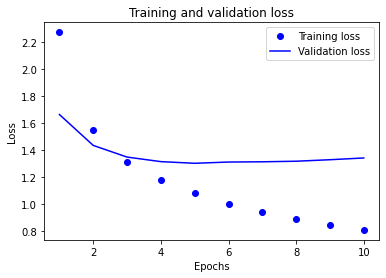

In [ ]:
per = history.history['precision_1']
val_per = history.history['val_precision_1']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(per) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

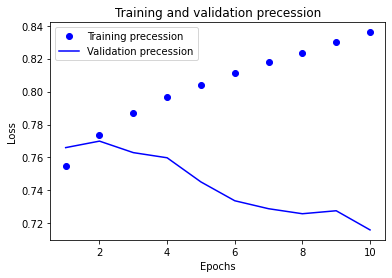

In [ ]:
epochs = range(1, len(per) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, per, 'bo', label='Training precession ')
# b is for "solid blue line"
plt.plot(epochs, val_per, 'b', label='Validation precession')
plt.title('Training and validation precession')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

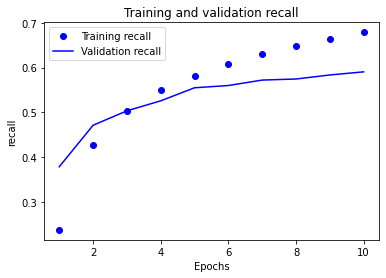

In [ ]:
recall = history.history['recall_1']
val_recall = history.history['val_recall_1']

epochs = range(1, len(per) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, recall, 'bo', label='Training recall')
# b is for "solid blue line"
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()

plt.show()

In [ ]:
test_loss, test_pre,test_recall = model_lstm_bi.evaluate(test_padded, test_labels)

1251/1251 [==============================] - 8s 7ms/step - loss: 1.3358 - precision_1: 0.7179 - recall_1: 0.5888


## Best Wishes


## Again: Delivery through this [form](https://forms.gle/PshJQw2bTa48Ligz7)